# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [1]:
from scipy import stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

# Challenge 1 - Generate and Plot Normal Distributions

#### Step 1: Generate samples and test normal distribution

Use mean = 50, standard_deviation = 5 and sample_size=[10, 50, 500, 5000] to generate 4 random samples that are normally distributed. Test your normal distributions with [`scipy.stats.normaltest`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html).


*Hint: Read the documentation for `scipy.stats.normaltest`. The function does not simply return Yes or No for whether your data is normal distribution. It returns the likelihood.*

In [2]:
# Variables
mu = 50;
sigma = 5;
sample_size = [10, 50, 500, 5000]

# Distributions & Tests
dists = [np.random.normal(mu, sigma, size) for size in sample_size]
tests = [stats.normaltest(dist) for dist in dists]

# Show tests
tests

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


[NormaltestResult(statistic=1.7534718566752119, pvalue=0.41613900481823296),
 NormaltestResult(statistic=2.175901631312408, pvalue=0.3369061696770253),
 NormaltestResult(statistic=0.9491668636458563, pvalue=0.6221441679543934),
 NormaltestResult(statistic=4.295951143211782, pvalue=0.11672021046522525)]

#### Interpret the normaltest results and make your observations.

`Comments:`
If p < alpha (if nothing is said 95% --> alpha 0.05) we can reject the distribution is normal.

In the 4 cases WE CANNOT REJECT the distributions are normal.

#### Step 2: Plot normal distributions

Use matplotlib subplots to plot a histogram of each sample. 

*Hints:*
- Use subplots to compare your figures side by side.

- Your output should look like below:

![normal distributions with different sample sizes](images/ch-1.png)

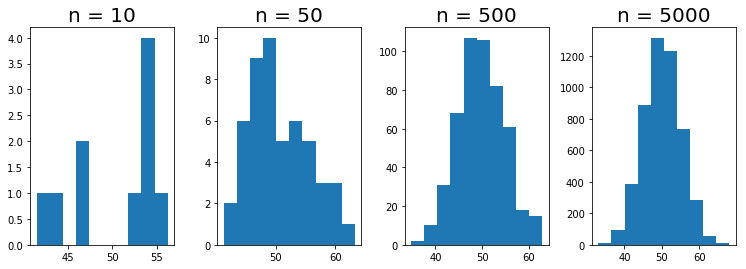

In [3]:
# Create figure and axes
fig, ax = plt.subplots(1, 4,figsize=(14,4))
plt.subplots_adjust(left=0.2, bottom=None, right=None, top=None, wspace=0.3, hspace=None)

# Variables
bins=10

# Plot each histogram
for i in range(len(dists)):
    ax[i].hist(dists[i], bins=bins)  
    ax[i].set_title(f"n = {sample_size[i]}", fontsize=20, fontweight=300,ha='center')

plt.show()



`Comments:`
**The bigger is the sample size, the more the histogram follows the shape of a Normal distribution. **

# Challenge 2 - Plot Probability Mass Function (PMF)

#### Background knowledge

[PMF](https://en.wikipedia.org/wiki/Probability_mass_function) shows the probability distribution of a **discrete random variable**. A [discrete random variable](https://en.wikipedia.org/wiki/Random_variable#Discrete_random_variable) has random numeric values that are not continuous. For example, the number of people in a household can only be integers but not floats. Therefore the number of people in a household is a discrete variable.

#### Question: We assume that the probability of clicking an Ad in a Youtube video is 0.15. We have a sample of 5 people who watched the video and we want to plot the PMF for a binomial distribution.

*Hint: use binom from `scipy.stats.binom`. Your output should look like below:*

![binom 10](images/ch-2.png)

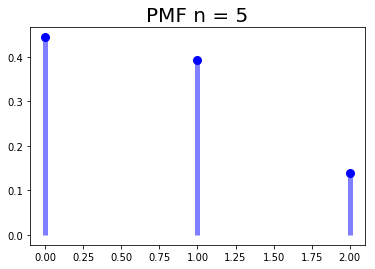

In [4]:
# Variables 
p = 0.15
n = 5

# Binomial distribution
x = np.arange(stats.binom.ppf(0.01, n, p),stats.binom.ppf(0.99, n, p))

# Plot line + bullet point -> Discrete Distribution Representation

fig, ax = plt.subplots(1, 1)
ax.plot(x, stats.binom.pmf(x, n, p), 'bo', ms=8, label='binom pmf')
ax.vlines(x, 0, stats.binom.pmf(x, n, p), colors='b', lw=5, alpha=0.5)
ax.set_title("PMF n = 5", fontsize=20, fontweight=300,ha='center')
plt.show()

#### Explain what you observe from the plot above.

`Comments:`



#### Now plot PMF with 50, 500, and 5000 visitors.

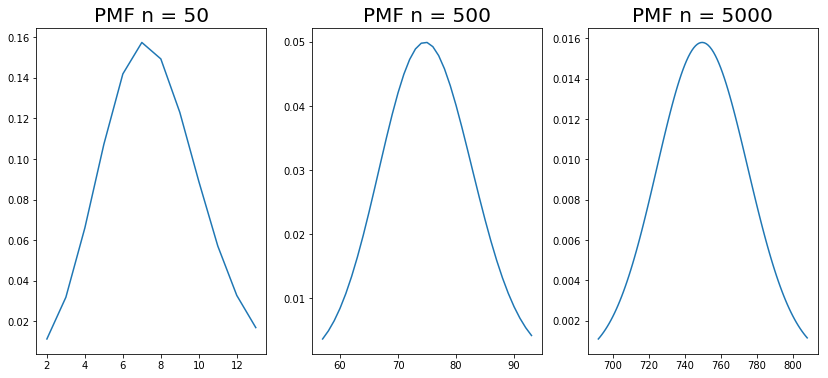

In [5]:
# Create figure and axes

fig, ax = plt.subplots(1, 3 ,figsize=(14,6))

# Variables

p = 0.15
ns = [50,500,5000]

xs = [np.arange(stats.binom.ppf(0.01, n, p),stats.binom.ppf(0.99, n, p)) for n in ns]


# Plot each PMF
# For visualization reasons, the next discrete distributions are represented using continuous lines

for i in range(len(xs)):
    ax[i].plot(xs[i], stats.binom.pmf(xs[i], ns[i], p), ms=2, label='binom pmf')
    ax[i].set_title(f"PMF n = {ns[i]}", fontsize=20, fontweight=300,ha='center')
plt.show()


#### What did you notice from the distribution plots? Comment your findings.

`Comments:`
Again, the more the higher is the sample, the more similar shape of the results to a normal distribution

# Challenge 3

#### Reaserch the Poisson distribution. Write about your own understanding of the Poisson distribution.

`Comments:`<br/> La distribución de **Poisson es una distribución de probabilidad discreta** que expresa, a partir de una frecuencia de ocurrencia media, **la probabilidad de que ocurra un determinado número de eventos durante cierto período de tiempo**. Concretamente, se especializa en la probabilidad de ocurrencia de sucesos con probabilidades muy pequeñas, o sucesos "raros". <br/> Source: Wikipedia


#### A website has an average of 300 visits per day. What is the probability of getting 320 visitors in a day?

*Hint: use `scipy.stats.poisson`*

In [6]:
# Variables
mu = 300
visits = 320

# Probability
p  = math.exp(-mu)*((mu**visits)/math.factorial(visits))
print(f'The probability that the number of visits ir {visits} in a day:', round(p,4))

The probability that the number of visits ir 320 in a day: 0.0116


In [7]:
p2 = stats.distributions.poisson.pmf(visits, mu)
print(f'The probability that the number of visits ir {visits} in a day:', round(p2,4))

The probability that the number of visits ir 320 in a day: 0.0116


#### What is the probability of getting 60 visits?

In [8]:
# Variables
visits = 60

# Probability
p3 = stats.distributions.poisson.pmf(visits, mu)
print(f'The probability that the number of visits ir {visits} in a day:', round(p3,4))

The probability that the number of visits ir 60 in a day: 0.0


#### Plot the distribution of the probability for getting 0-1000 visits.

*Hints:* 

- Create a list to store the Poisson distribution probabilities for n=0 to 1000. Then plot the probabilities.

- Your plot should look like below:

![poisson distribution](images/ch-3.png)

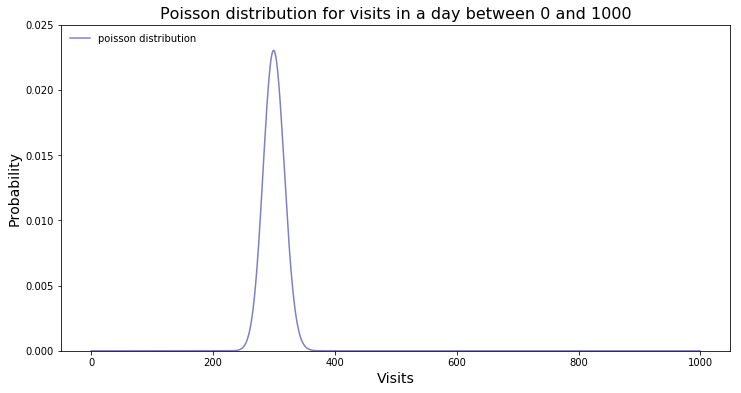

In [9]:
# Variables
visits = range(1000)

x_is = []
y_is = []
ticks = []

for i in range(1000):
    x_is.append(i)
    y_is.append(stats.distributions.poisson.pmf(i, mu))

    
# Plot of the distribution
fig, ax = plt.subplots(1, 1, figsize=(12,6))
plt.sca(ax)
plt.ylim(0,0.025)
plt.plot(x_is, y_is, alpha=0.5, color='darkblue', label='poisson distribution')
plt.title('Poisson distribution for visits in a day between 0 and 1000', fontsize=16)
plt.xlabel('Visits', fontsize=14)
plt.ylabel('Probability', fontsize=14)
ax.legend(loc='upper left', frameon=False)
plt.show()


# Challenge 4 - Central Limit Theorem
#### Example of application

A delivery company needs 35 minutes to deliver a package, with a standard deviation of 8 minutes. Suppose that in one day, they deliver 200 packages.

#### a. What is the probability that the mean delivery time today is between 30 and 35 minutes?

In [10]:
# Variables
mean = 35
deviation = 8


# Probability
cdf35 = stats.norm.cdf(35, mean, deviation)
cdf30 = stats.norm.cdf(30, mean, deviation)
p30_35 = cdf35 - cdf30
print(f'The probability between 30 and 35 minutes:', round(p30_35,4))

The probability between 30 and 35 minutes: 0.234


#### b. What is the probability that in total, it takes more than 115 hours to deliver all 200 packages?

In [11]:
# Variables

n = 200
target = 115*60

# Probability
cdf6900 = stats.norm.cdf(target, mean * n , deviation*(n**0.5))
print(f'The probability it takes more than 115 hours is:', round(1-cdf6900,4))

The probability it takes more than 115 hours is: 0.8116


# Challenge 5 - Normal Variables 

The value (in thousands) of the monthly sales of a publishing company follows a normal distribution with a mean equal to 200 and a standard deviation equal to 40. 

<div align="center">$X → N(200,40)$</div>

#### 1. Find the probability that the monthly sales are more than 300. 

In [12]:
# Variables
mu = 200
sigma = 40
target = 300

# Probability
cdf300 = stats.norm.cdf(target, mu , sigma)
print(f'The probability the sales are more than 300 is:', round(1-cdf300,4))

The probability the sales are more than 300 is: 0.0062


#### 2. Find the probability that the monthly sales fall between 160 and 240.

In [13]:
# Probability
cdf160 = stats.norm.cdf(160, mu , sigma)
cdf240 = stats.norm.cdf(240, mu , sigma)
p160_240 = cdf240 - cdf160

print(f'The probability the sales are between 160 and 240 is:', round(p160_240,4))

The probability the sales are between 160 and 240 is: 0.6827


#### 3. Find the probability that the monthly sales do not exceed 150.

In [14]:
# Probability
cdf150 = stats.norm.cdf(150, mu , sigma)

print(f'The probability the sales not exceed 150 is:', round(cdf150,4))

The probability the sales not exceed 150 is: 0.1056


#### 4. Find the probability that the monthly sales exceed 3000. 

In [15]:
# Probability
cdf3000 = stats.norm.cdf(3000, mu , sigma)

print(f'The probability the sales exceed 3000 is:', round(1-cdf3000,4))

The probability the sales exceed 3000 is: 0.0


# Challenge 6 - Poisson distribution
The mean number of violent robberies per month that are registered in a particular barrio is 4. Find the following probabilities.
#### 1.The probability that in a particular month there is no violent robbery.

In [16]:
# Variables
mu = 4

# Probability
p0 = stats.poisson.cdf(0, mu)
print(f'The probability there is no robbery is:', round(p0,4))

The probability there is no robbery is: 0.0183


#### 2. The probability that there are at least 1 in a given month. 

In [17]:
# Probability
print(f'The probability there is at least 1 robbery is:', round(1-p0,4))

The probability there is at least 1 robbery is: 0.9817


#### 3. The probability that there are between 2 and 6 (inclusive) in a given month.

In [18]:
# Probability
p2 = stats.poisson.cdf(2, mu)
p6 = stats.poisson.cdf(6, mu)
p2_6 = p6-p2
print(f'The probability between 2 nd 6 robberies is:', round(p2_6,4))

The probability between 2 nd 6 robberies is: 0.6512


#### 4. The probability that there more than two in 15 days.  

In [19]:
# Probability
mu15 = mu/2
p2 = stats.poisson.cdf(2, mu15)
print(f'The probability more than 2 in 15 days is:', round(1-p2,4))

The probability more than 2 in 15 days is: 0.3233
